## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
#mouse dataframe
mouse_metadata_df = pd.DataFrame(mouse_metadata)
# Display the data table for preview
full_data_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
nu_of_mice = len(full_data_df["Mouse ID"].unique())
nu_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
cleaned_full_data_df = full_data_df.drop_duplicates()
cleaned_full_data_df.sort_values('Drug Regimen')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
333,j119,Capomulin,Female,7,23,25,42.417166,1
296,b742,Capomulin,Male,7,21,30,39.167949,0
295,b742,Capomulin,Male,7,21,25,38.617684,0
294,b742,Capomulin,Male,7,21,20,37.950355,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
...,...,...,...,...,...,...,...,...
645,c264,Zoniferol,Female,11,27,35,61.074795,2
646,c264,Zoniferol,Female,11,27,40,65.708323,2
647,c264,Zoniferol,Female,11,27,45,67.942121,2
1249,n967,Zoniferol,Male,11,27,10,47.471723,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.
nu_of_mice = len(cleaned_full_data_df["Mouse ID"].unique())
nu_of_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_by_drug_df = cleaned_full_data_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary dataframe.
sum_df = pd.DataFrame({"Mean": grouped_by_drug_df['Tumor Volume (mm3)'].mean(), 
                      "Median": grouped_by_drug_df['Tumor Volume (mm3)'].median(),
                      "Variance": grouped_by_drug_df['Tumor Volume (mm3)'].var(),
                      "Standard Deviation": grouped_by_drug_df['Tumor Volume (mm3)'].std(),
                      "SEM": grouped_by_drug_df["Tumor Volume (mm3)"].sem()})
sum_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     160
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64


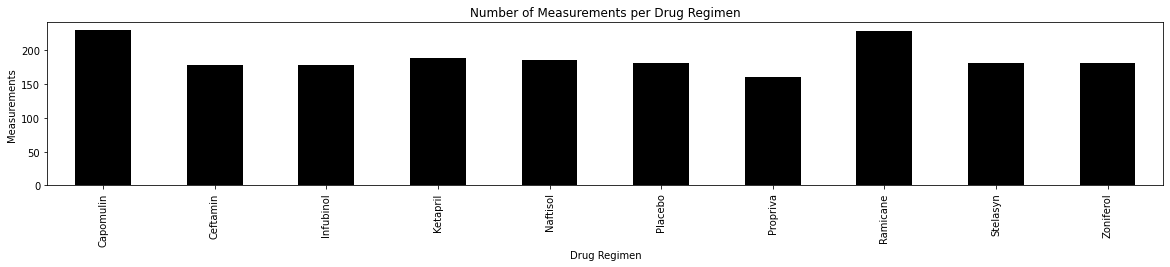

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count = grouped_by_drug_df['Tumor Volume (mm3)'].count()
print(regimen_count)
regimen_count_chart= regimen_count.plot(kind="bar", color='black', figsize=(20,3))
regimen_count_chart.set_title("Number of Measurements per Drug Regimen")
regimen_count_chart.set_ylabel("Measurements")
regimen_count_chart.set_xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

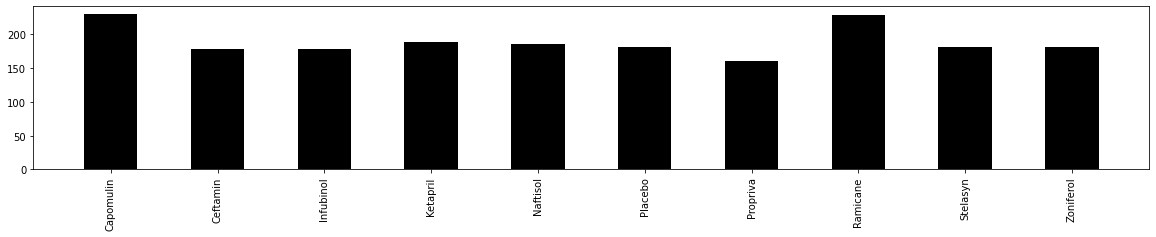

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#regimen_count_df = pd.DataFrame({"Drug Regimen": cleaned_full_data_df['Drug Regimen'].unique(), 
                                 #"Number of measurements": regimen_count})
#print(regimen_count_df)
x_axis = np.arange(len(grouped_by_drug_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, regimen_count, color="black", alpha=1, align='center', width=.5)
plt.xticks(tick_locations, regimen_count.index.values, rotation="vertical")
plt.show()
plt.tight_layout()

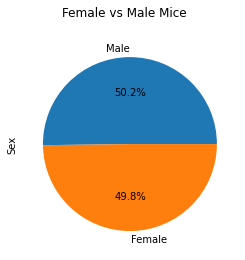

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
num_of_mice=mouse_metadata_df['Sex'].value_counts()
num_of_mice_chart = num_of_mice.plot(kind='pie', subplots=True, autopct="%.1f%%", title='Female vs Male Mice')
plt.show()

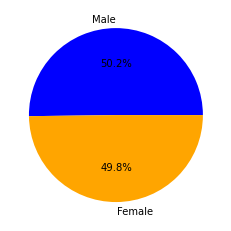

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
num_of_female_mice = len(mouse_metadata_df.loc[mouse_metadata_df['Sex'] == "Female"])
num_of_male_mice = len(mouse_metadata_df.loc[mouse_metadata_df['Sex'] == "Male"])

labels=["Male", "Female"]
numbers = [num_of_male_mice, num_of_female_mice]
colors= ["blue", "orange"]
explode=[0,0]

plt.pie(numbers, explode=explode,labels=labels, colors=colors, autopct="%.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

#getting the final tumor volume for drug regimen capomulin
final_tumor_volume= cleaned_full_data_df.loc[cleaned_full_data_df['Drug Regimen']== 'Capomulin', :]
final_tumor_volume = final_tumor_volume.loc[final_tumor_volume['Timepoint']== 45]
final_tumor_volume_cap = pd.DataFrame([final_tumor_volume['Drug Regimen'], final_tumor_volume['Mouse ID'], final_tumor_volume['Tumor Volume (mm3)']]).transpose()

#getting the final tumor volume for drug regimen Ramicane
final_tumor_volume= cleaned_full_data_df.loc[cleaned_full_data_df['Drug Regimen']== 'Ramicane', :]
final_tumor_volume = final_tumor_volume.loc[final_tumor_volume['Timepoint']== 45]
final_tumor_volume_ram = pd.DataFrame([final_tumor_volume['Drug Regimen'], final_tumor_volume['Mouse ID'], final_tumor_volume['Tumor Volume (mm3)']]).transpose()

#getting the final tumor volume for drug regimen Infubinol
final_tumor_volume= cleaned_full_data_df.loc[cleaned_full_data_df['Drug Regimen']== 'Infubinol', :]
final_tumor_volume = final_tumor_volume.loc[final_tumor_volume['Timepoint']== 45]
final_tumor_volume_inf = pd.DataFrame([final_tumor_volume['Drug Regimen'], final_tumor_volume['Mouse ID'], final_tumor_volume['Tumor Volume (mm3)']]).transpose()

#getting the final tumor volume for drug regimen Ceftamin
final_tumor_volume= cleaned_full_data_df.loc[cleaned_full_data_df['Drug Regimen']== 'Ceftamin', :]
final_tumor_volume = final_tumor_volume.loc[final_tumor_volume['Timepoint']== 45]
final_tumor_volume_cef = pd.DataFrame([final_tumor_volume['Drug Regimen'], final_tumor_volume['Mouse ID'], final_tumor_volume['Tumor Volume (mm3)']]).transpose()

print(final_tumor_volume_cap)
print(final_tumor_volume_cef)
print(final_tumor_volume_inf)
print(final_tumor_volume_ram)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


    Drug Regimen Mouse ID Tumor Volume (mm3)
19     Capomulin     s185            23.3436
29     Capomulin     x401             28.484
39     Capomulin     m601             28.431
104    Capomulin     u364            31.0239
124    Capomulin     y793            31.8962
134    Capomulin     r554            32.3774
144    Capomulin     m957            33.3291
164    Capomulin     t565            34.4553
204    Capomulin     i738            37.3118
224    Capomulin     w914             36.041
244    Capomulin     g288             37.074
282    Capomulin     l897            38.8469
299    Capomulin     b742            38.9396
309    Capomulin     b128            38.9829
337    Capomulin     j119            38.1252
350    Capomulin     v923            40.6581
360    Capomulin     g316            40.1592
370    Capomulin     s710            40.7286
380    Capomulin     l509             41.483
390    Capomulin     r944            41.5815
440    Capomulin     i557             47.686
     Drug 

In [14]:
#calculating quartiles for ceftamin
quartiles = final_tumor_volume_cef['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqcef = quartiles[0.25]
upperqcef = quartiles[0.75]
iqr = upperqcef-lowerqcef

lower_bound_cef = lowerqcef - (1.5*iqr)
upper_bound_cef = upperqcef + (1.5*iqr)
print(f"Values below {lower_bound_cef} could be outliers.")
print(f"Values above {upper_bound_cef} could be outliers.")

Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


In [15]:
#calculating quartiles for infubinol
quartiles = final_tumor_volume_inf['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqinf = quartiles[0.25]
upperqinf = quartiles[0.75]
iqr = upperqinf-lowerqinf

lower_bound_inf = lowerqinf - (1.5*iqr)
upper_bound_inf = upperqinf + (1.5*iqr)
print(f"Values below {lower_bound_inf} could be outliers.")
print(f"Values above {upper_bound_inf} could be outliers.")

Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [16]:
#calculating quartiles for ramicane
quartiles = final_tumor_volume_ram['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqram = quartiles[0.25]
upperqram = quartiles[0.75]
iqr = upperqram-lowerqram

lower_bound_ram = lowerqram - (1.5*iqr)
upper_bound_ram = upperqram + (1.5*iqr)
print(f"Values below {lower_bound_ram} could be outliers.")
print(f"Values above {upper_bound_ram} could be outliers.")

Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [17]:
#calculating quartiles for capomulin
quartiles = final_tumor_volume_cap['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqcap = quartiles[0.25]
upperqcap = quartiles[0.75]
iqr = upperqcap-lowerqcap

lower_bound_cap = lowerqcap - (1.5*iqr)
upper_bound_cap = upperqcap + (1.5*iqr)
print(f"Values below {lower_bound_cap} could be outliers.")
print(f"Values above {upper_bound_cap} could be outliers.")



Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [18]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [58]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

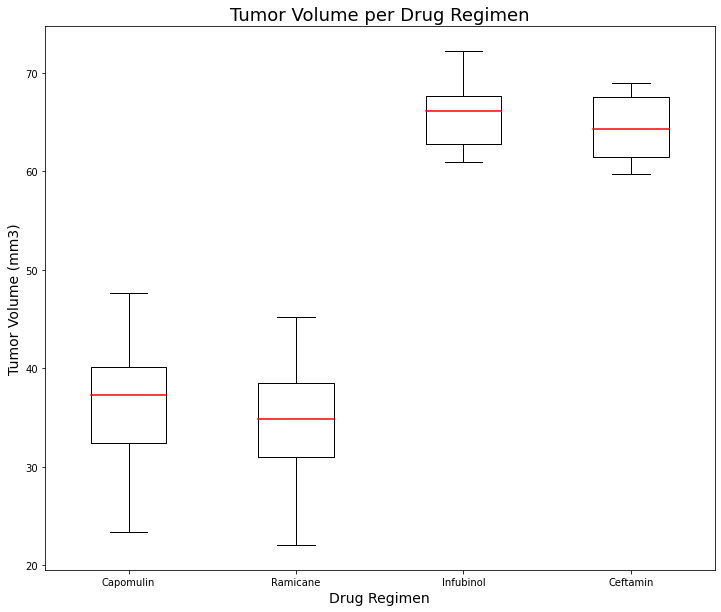

In [40]:
#data for boxplots
cap = final_tumor_volume_cap['Tumor Volume (mm3)'] 
ram = final_tumor_volume_ram['Tumor Volume (mm3)']
inf = final_tumor_volume_inf['Tumor Volume (mm3)']
cef = final_tumor_volume_cef['Tumor Volume (mm3)'] 
data = [cap, ram, inf, cef] 

#creation of figure  
fig = plt.figure(figsize =(12, 10)) 
ax = fig.add_subplot(111) 

#creation and customize boxplots
bp = ax.boxplot(data)
plt.setp(bp['fliers'], color='red', marker='+')
plt.setp(bp['medians'], color='red', linewidth = 1.5)
ax.set_ylabel("Tumor Volume (mm3)", fontsize=14)
ax.set_xlabel('Drug Regimen', fontsize=14)
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']) 
plt.title("Tumor Volume per Drug Regimen", fontsize=18) 
plt.show(bp) 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

AttributeError: 'Line2D' object has no property 'markers'

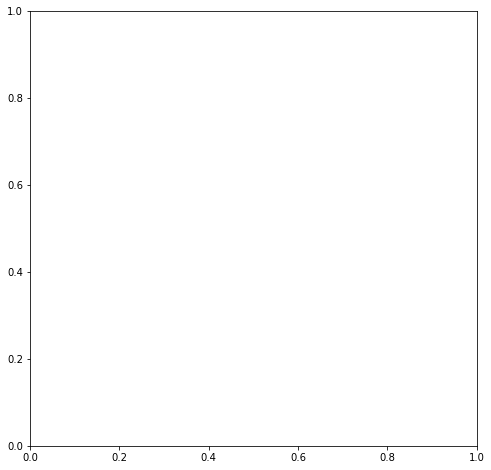

In [57]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#mouse r554
mouse_df = cleaned_full_data_df.loc[cleaned_full_data_df['Mouse ID']== 'r554']
mouse_df
fig2 = plt.figure(figsize=(8, 8))
x_axis = mouse_df['Timepoint']
y_axis = mouse_df['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
plt.title("Mouse r554", fontsize=18)
plt.xlabel("Timepoint of measurement", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)
plt.show()



In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
